In [ ]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer
import re
from sklearn.metrics import silhouette_score 

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
file = r'/content/drive/My Drive/final_project.csv'
data=pd.read_csv(file, engine='python')
data.columns=["project"]
rawlist=list(data.project)
print(rawlist)

["A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'", "A study to analyze Steel Cast Limited, a forging companys performance in comparison with its peers.\\n Used fundamental analysis of Financial Statements and calculated relevant Financial Ratios to evaluate companys status.\\n Calculated Liquidity, Financing and Performance ratios and compared with the best performer in the sector, Bharat Forge Limited.'", "Achieved a very high PSNR, currently drafting paperforthe results and algorithm.\\n Reconstruction in k-space itself. No superresolution of images. This will make t

In [ ]:
data.project[0]

"A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'"

In [ ]:
# cleaning the text
# we need to clean the data in order to get rid of the not relevant words , we need to make a bag of words model which consists of only relevant words
# also apply stemming which is the reducing higher versions of a word to its root level
# the sub method will help us clean the data first parameter means that we will not remove any letter from a-z or A-Z 
import re
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project

'A de duplication task faces two major challenges first one was that the de dup algorithm has O n   complexity  This means time required to get answer will rise exponentially as the number of records increase  This problem was solved using sorted neighborhood approach  n Second most important challenge was to achieve tradeoff between precision and recall i e  improves F  score  This problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# now we convert all uppercase letters to lowercase
project = project.lower()
project

'a de duplication task faces two major challenges first one was that the de dup algorithm has o n   complexity  this means time required to get answer will rise exponentially as the number of records increase  this problem was solved using sorted neighborhood approach  n second most important challenge was to achieve tradeoff between precision and recall i e  improves f  score  this problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# making our own custom stopwords list
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
stopwords = nltk.corpus.stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# cleaning the text
# split function is used to convert the string into a list of words so that we can with help of a for loop go through different words and see if its relevant or not
# the irrelevant word THIS must be removed after this
# tokenised project words excluding the words from nltk as well as our custom stopwords(3)
import re
import nltk
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
project = [word for word in project if not word in set(stopwords)]
project

['de',
 'duplication',
 'task',
 'faces',
 'two',
 'major',
 'challenges',
 'first',
 'one',
 'de',
 'dup',
 'algorithm',
 'n',
 'complexity',
 'means',
 'time',
 'required',
 'get',
 'answer',
 'rise',
 'exponentially',
 'number',
 'records',
 'increase',
 'problem',
 'solved',
 'using',
 'sorted',
 'neighborhood',
 'approach',
 'n',
 'second',
 'important',
 'challenge',
 'achieve',
 'tradeoff',
 'precision',
 'recall',
 'e',
 'improves',
 'f',
 'score',
 'problem',
 'solved',
 'using',
 'machine',
 'learning',
 'techniques',
 'collecting',
 'training',
 'data']

In [ ]:
# joining back the words to form string
#we use inverted commas with space because we want space between the different words
project = ' '.join(project)
project

'de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data'

In [ ]:
# do the above cleaning process for every review using a for loop
# corpus will be alist containig all the cleaned reviews
# stemming not applied
import re
import nltk
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,723):
    project = re.sub('[^a-zA-Z]', ' ', data.project[i])
    project = project.lower()
    project = project.split()
    project = [word for word in project if not word in set(stopwords)]
    project = ' '.join(project)
    corpus.append(project)
    #print(corpus) HERE I HAVE NOT  PRINTED THE CORPUS BECAUSE IT WAS SHOWING AN ERROR: IOPub data rate exceeded


In [ ]:
# CORPUS WITHOUT CUSTOM STOPWORDS
corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MAXIMUM OF 15 WORDS IN THE CORPUS
split_list14 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) <= 10:
    print(temp)
    split_list14.append(temp)

    sentence14 = []
for items in split_list14:
  sentence14.append(' '.join(items))

['achieved', 'accuracy', 'k', 'k', 'parameters', 'used', 'keras', 'n', 'max', 'accuracy']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['error']
['error']
['blog', 'learning', 'basics', 'analytics']
['digital', 'assistant', 'written', 'python', 'uses', 'speech', 'recognition', 'obey', 'commands']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['habit', 'tracking', 'app', 'build', 'using', 'swiftui']
['visualization', 'dashboard', 'different', 'visualizations', 'different', 'parameters']
['altrium', 'quickest', 'service', 'solve', 'homework']
['internal', 'member', 'app', 'dsckiit', 'team']
['iot', 'based', 'biometric', 'project', 'automate', 'process', 'taking', 'attendance']
['analysis', 'baseball', 'player', 'dataset', 'career', 'statistics']
['analytics', 'vidya', 'machine', 'learning', 'contests', 'solutions']
['analyzed', 'titanic', 'dataset', 'kaggle', 'used', 'pr

In [ ]:
sentence14

['achieved accuracy k k parameters used keras n max accuracy',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'error',
 'error',
 'blog learning basics analytics',
 'digital assistant written python uses speech recognition obey commands',
 'fitness app offering diet exercise plans users',
 'fitness app offering diet exercise plans users',
 'habit tracking app build using swiftui',
 'visualization dashboard different visualizations different parameters',
 'altrium quickest service solve homework',
 'internal member app dsckiit team',
 'iot based biometric project automate process taking attendance',
 'analysis baseball player dataset career statistics',
 'analytics vidya machine learning contests solutions',
 'analyzed titanic dataset kaggle used predict survival passengers onboard',
 'analyzing comparing gdps different indian states finding ways improve n',
 'android application real time bus tracking',
 'bridge detection roi sar satellite images',
 'build mod

In [ ]:
len(sentence14)

95

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MINIMUM OF 15 WORDS IN THE CORPUS
split_list15 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) > 10:
    print(temp)
    split_list15.append(temp)

    new_corpus = []
for items in split_list15:
  new_corpus.append(' '.join(items))

['de', 'duplication', 'task', 'faces', 'two', 'major', 'challenges', 'first', 'one', 'de', 'dup', 'algorithm', 'n', 'complexity', 'means', 'time', 'required', 'get', 'answer', 'rise', 'exponentially', 'number', 'records', 'increase', 'problem', 'solved', 'using', 'sorted', 'neighborhood', 'approach', 'n', 'second', 'important', 'challenge', 'achieve', 'tradeoff', 'precision', 'recall', 'e', 'improves', 'f', 'score', 'problem', 'solved', 'using', 'machine', 'learning', 'techniques', 'collecting', 'training', 'data']
['study', 'analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'performance', 'comparison', 'peers', 'n', 'used', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'n', 'calculated', 'liquidity', 'financing', 'performance', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited']
['achieved', 'high', 'psnr', 'currently', 'drafting', 'paperforthe', 'result

In [ ]:
# THIS IS OUR NEW CORPUS
new_corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(new_corpus)

628

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords1 = nltk.corpus.stopwords.words('english')

newStopWords = ['using','used','user','dataset', 'c', 'f', 'n', 'e','type','rating','performing','complete','sample', 'experience','develop','developed','function','design','applications','display','displayed','provide','provided','check','checked','working','high','low', 'current','computing','go','version','level','player','completed','better','level','online','people','management','type','uses','social','working','worked','important','quality','compiler','incorporating','derived','derive','upon','improoved','restaurant','please','standard','diet','refer','order', 'access',   'ease', 'skill', 'slills', 'delivery', 'require', 'required', 'requirement', 'answering', 'design','created', 'creating', 'practices', 'analyzed', 'common', 'successfully',  'adding',  'create', 'technologies', 'development','method','built', 'study', 'studied', 'given', 'review', 'value', 'done', 'result', 'proposed', 'make', 'knowledge', 'apply', 'applied',  'consists', 'description', 'approaches',   'succesfully', 'capable', 'automatically', 'challenge', 'records', 'products', 'repository', 'perform', 'performed', 'detection', 'detect', 'large', 'made', 'scale',  'display', 'video', 'help', 'helped' ,'helping',  'purpose', 'content', 'gives', 'components', 'object',  'methodology', 'problem',  'person', 'book', 'media', 'general' , 'ignore', 'two',  'customer', 'take', 'information', 'users', 'results', 'involved', 'building', 'send', 'workshop',  'team', 'skills', 'basic', 'environment', 'diagrams', 'concepts', 'succesfully', 'whether', 'variables',  'process',  'aim', 'work',  'build',  'customers',   'number', 'work', 'one', 'file', 'approach', 'day', 'related', 'case', 'new', 'benchmark', 'sense', 'iitb', 'tried', 'commands', 'event', 'provides', 'aim',  'existing', 'details', 'etc', 'search', 'food', 'first', 'input', 'output', 'booking', 'received', 'practises', 'kernel', 'loaded', 'efficient', 'detail',  'goal', 'identify', 'find',  'single', 'real', 'sudden', 'location', 'learned', 'part', 'udacity', 'task','techniques','various',  'use', 'system','provide',  'based', 'project', 'product', 'different', 'student', 'objective', 'task', 'report', 'determine', 'performance', 'model', 'data', 'implement', 'implementation', 'application', 'guide', 'prof', 'predict', 'technology', 'jupyter', 'notebook', 'project'  , 'matplotlib', 'seaborn',  'achieved', 'different', 'technique', 'developed',  'implemented', 'worked',  'code', 'document', 'word', 'based',  'google', 'colab', 'github' ]
stopwords1.extend(newStopWords)
stopwords1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:

new_corpus_customsp = []
for i in range(0,628):
  project = new_corpus[i]
  project = project.split()
  project = [word for word in project if not word in set(stopwords1)]
  project = ' '.join(project)
  new_corpus_customsp.append(project)


In [ ]:
new_corpus_customsp

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
tokenized_project = [project.split() for project in new_corpus_customsp]

In [ ]:
tokenized_project

[['de',
  'duplication',
  'faces',
  'major',
  'challenges',
  'de',
  'dup',
  'algorithm',
  'complexity',
  'means',
  'time',
  'get',
  'answer',
  'rise',
  'exponentially',
  'increase',
  'solved',
  'sorted',
  'neighborhood',
  'second',
  'achieve',
  'tradeoff',
  'precision',
  'recall',
  'improves',
  'score',
  'solved',
  'machine',
  'learning',
  'collecting',
  'training'],
 ['analyze',
  'steel',
  'cast',
  'limited',
  'forging',
  'companys',
  'comparison',
  'peers',
  'fundamental',
  'analysis',
  'financial',
  'statements',
  'calculated',
  'relevant',
  'financial',
  'ratios',
  'evaluate',
  'companys',
  'status',
  'calculated',
  'liquidity',
  'financing',
  'ratios',
  'compared',
  'best',
  'performer',
  'sector',
  'bharat',
  'forge',
  'limited'],
 ['psnr',
  'currently',
  'drafting',
  'paperforthe',
  'algorithm',
  'reconstruction',
  'k',
  'space',
  'superresolution',
  'images',
  'nmri',
  'lot',
  'faster',
  'highly',
  'sub',
 

In [ ]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2

In [ ]:
ft_model = FastText(tokenized_project,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

In [ ]:
print(ft_model.wv['machine'])

[-0.59735763  0.5820111  -0.27730456 -0.25022572  0.00286608  0.45751604
 -0.3825197  -0.29587898 -0.36551082 -0.29957467  0.110087    0.25907165
 -0.04719521  0.13226265  0.5761978   0.41448987 -0.5101766   0.42402306
 -0.3428932  -0.30359143 -0.21719985  0.30177844 -0.3964992   0.07323478
 -0.5767455  -0.07759247  0.678098   -0.14828272 -0.4780387   0.26985484
  0.23317018  0.6835477   0.55629534  0.17263009  0.08189565  0.05037066
  0.34700897 -0.24128452 -0.29945743 -0.10187126  0.05982252 -0.6497535
  0.1241386   0.4113477   0.00215319  0.10506029 -0.25245833  0.54648954
 -0.27098662  0.17703295  0.15884244  0.44567874 -0.21793896 -0.7028097
 -0.5400102  -0.20410505  0.35399827  0.2684612   0.46721098  0.4631854 ]


In [ ]:
print(ft_model.wv)

In [ ]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [ ]:
X=[]
for sentence in tokenized_project:
    X.append(sent_vectorizer(sentence, ft_model))   
 
print ("========================")
print (X)
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


Streaming output truncated to the last 5000 lines.
       -0.134964  ,  0.05834642,  0.4519699 , -0.3406324 ,  0.38174808,
        0.03304623,  0.18807806, -0.01274967, -0.41797164, -0.40021026,
       -0.3195432 ,  0.21319962,  0.28361022, -0.23906605,  0.11322749],
      dtype=float32), array([-0.79259163, -0.1726999 ,  0.34125617, -0.57602173, -0.40393004,
        0.1039319 , -0.20489857,  0.31314868, -0.45912656, -0.10866512,
       -0.02273048,  0.09339484,  0.34692636,  0.01514117,  0.93944913,
        0.38737044, -0.72480077,  0.4654502 ,  0.24843879,  0.14157626,
       -0.6863103 , -0.01986252, -0.26739028,  0.11378924,  0.02279488,
       -0.39951998,  0.12301296,  0.37766257,  0.13299544,  0.04390525,
       -0.49656978, -0.41561732,  0.05839797,  0.12174375, -0.0944846 ,
       -0.2668155 , -0.04401832, -0.64326847, -0.16900599, -0.31154665,
       -0.25479373, -0.41709104,  0.04294705,  0.58846503,  0.00318557,
       -0.46982825,  0.00295145,  0.23189288, -0.12563638,  1.

In [ ]:
len(X)

628

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


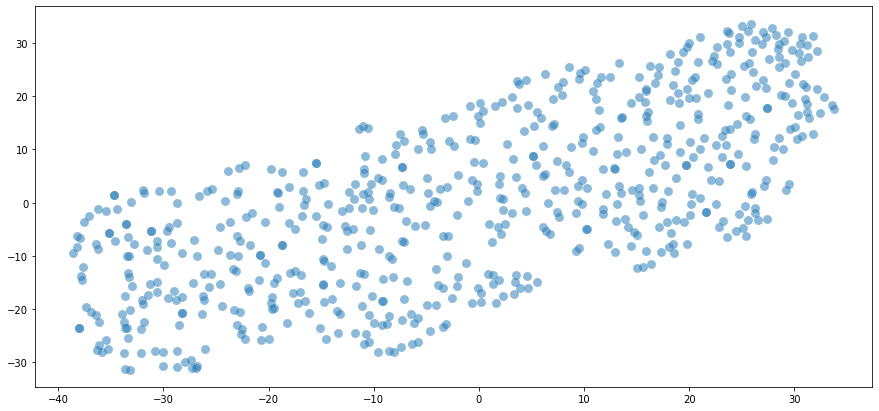

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

distance = pairwise_distances(X, metric='cosine')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7


projection = TSNE().fit_transform(distance)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(*projection.T, **plot_kwds)

No handles with labels found to put in legend.


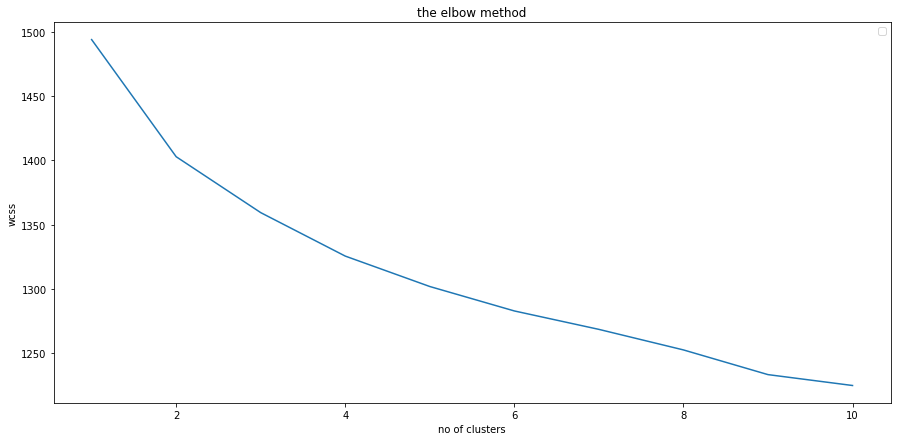

In [ ]:
# Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.legend()
plt.show()

In [ ]:
# Apply kmeans to the dataset
# this gives the nameof cluster to which each person belongs
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[6 6 0 0 6 0 6 6 4 2 3 0 6 4 2 6 6 6 5 5 5 5 5 5 5 5 5 5 4 2 3 0 6 6 2 2 2
 6 3 5 2 0 0 6 2 6 0 3 2 2 2 0 0 0 0 2 5 6 0 0 0 3 3 2 2 6 4 4 3 0 0 2 4 4
 6 4 6 6 0 4 2 6 0 3 0 6 2 4 5 2 6 0 0 3 4 6 6 6 2 4 0 3 2 4 0 6 0 0 6 2 6
 2 6 2 6 0 4 4 4 6 4 4 0 6 2 1 2 1 3 4 3 0 3 6 3 3 6 5 0 4 4 4 6 2 2 0 4 3
 2 2 0 1 4 6 0 3 3 3 2 6 3 6 6 0 5 0 6 6 4 2 4 3 0 2 1 0 2 2 6 6 6 1 2 6 6
 6 2 3 2 2 3 5 2 1 1 0 0 6 6 2 3 3 4 6 6 3 4 0 2 2 6 0 6 6 3 6 4 0 0 0 4 4
 3 2 2 6 0 3 0 6 0 0 0 5 6 6 6 2 3 2 1 0 4 2 1 1 2 1 3 6 1 4 6 2 0 5 6 3 3
 0 0 4 6 2 2 1 0 2 0 2 1 6 3 0 4 2 3 3 6 5 2 2 6 6 3 6 0 0 3 1 2 2 2 4 2 0
 2 3 6 6 2 4 0 3 6 1 2 1 3 2 3 1 1 2 1 0 6 3 6 2 0 2 3 6 4 4 0 2 6 2 0 2 0
 2 6 6 2 2 6 2 6 0 3 0 6 2 0 0 2 6 3 2 0 0 6 4 3 4 0 0 0 3 3 0 5 0 0 2 6 1
 4 6 6 5 0 0 0 6 2 2 6 2 2 2 3 3 2 2 2 1 1 4 2 3 2 6 0 2 4 6 4 0 6 6 2 4 4
 0 6 3 2 2 6 0 6 2 0 3 2 1 2 6 6 5 0 5 2 6 3 2 0 2 6 6 5 0 2 2 3 6 3 2 2 1
 2 2 3 4 6 6 2 3 2 6 4 3 0 2 3 2 6 1 1 2 3 6 0 0 6 6 0 0 2 6 4 4 0 2 2 0 1
 6 6 6 0 2 4 6 6 2 2 4 2 

In [ ]:
len(y_kmeans)

628

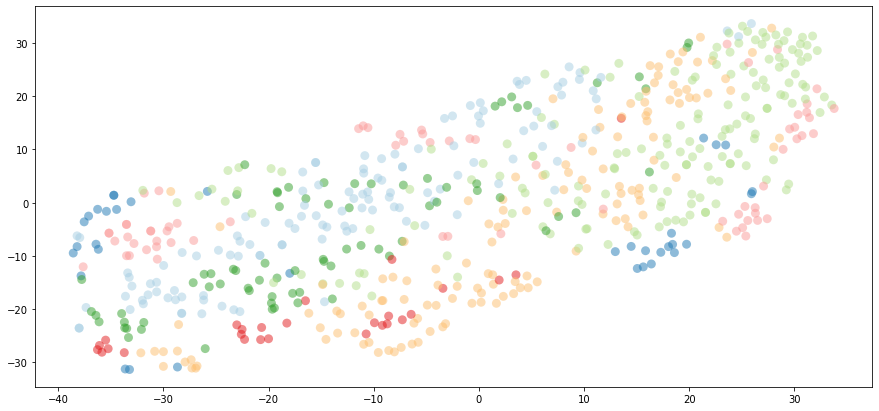

In [ ]:
color_palette = sns.color_palette('Paired', 20)
cluster_colors = [color_palette[X] if X >= 0
                  else (0.5, 0.5, 0.5)
                  for X in y_kmeans]
cluster_member_colors = (cluster_colors)
plt.scatter(*projection.T, s=80, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [ ]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.05726934
For no of clusters = 3  The average silhouette_score is : 0.049177278
For no of clusters = 4  The average silhouette_score is : 0.0497314
For no of clusters = 5  The average silhouette_score is : 0.04491501
For no of clusters = 6  The average silhouette_score is : 0.04115273
For no of clusters = 7  The average silhouette_score is : 0.036771055
For no of clusters = 8  The average silhouette_score is : 0.028680796
For no of clusters = 9  The average silhouette_score is : 0.029641189
For no of clusters = 10  The average silhouette_score is : 0.03777832


In [ ]:
#first cluster
list1 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 0:
        list1.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list1)

124

In [ ]:
#projects in cluster 1
list1

['psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'american sign language primary language north america deaf individuals also hard hearing individuals language employs signs hand along facial gestures bodily pastures images contained hand gestures encoded alphabetic letters trained convolutional neural network classify images asl letters loading examining preprocessing trained network tested',
 'end end pipeline abnormalities chest x ray top chexpert chest x ray competition nhttps stanfordmlgroup io competitions chexpert stanford datasets chest x ray images multiple image processing balancing adaptive histogram equalization augmentation classification densenet architecture improving accura

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list1)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(40)

term    weight
111                 image  0.064633
113                images  0.064170
150               network  0.063685
154                neural  0.057303
2                accuracy  0.047503
235               trained  0.046990
155        neural network  0.044107
36         classification  0.037291
126              learning  0.036341
44                    cnn  0.035057
153              networks  0.035007
186           recognition  0.032531
8               algorithm  0.031309
60                   deep  0.030786
78                   face  0.026959
145                models  0.026134
33                  class  0.026090
109                 human  0.025817
234                 train  0.025042
54          convolutional  0.024955
14           architecture  0.024384
40               classify  0.023992
13                    app  0.023394
223            tensorflow  0.023088
55   convolutional neural  0.021725
61          deep learning  0.021448
231                  time  0.020785
102               genetic  0.020473
148              multiple  0.020291
156       neural networks  0.020271
198            resolution  0.019696
170                 paper  0.019598
183               pytorch  0.019322
252                  yolo  0.019163
230                  text  0.019029
237              training  0.019010
121                 keras  0.018635
182                python  0.018197
161                  nthe  0.018041
226                  test  0.017791

In [ ]:
list10 = ' '.join(list1)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list10)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of psnr is : 1
Frequency of currently is : 4
Frequency of drafting is : 2
Frequency of paperforthe is : 1
Frequency of algorithm is : 17
Frequency of reconstruction is : 5
Frequency of k is : 12
Frequency of space is : 7
Frequency of superresolution is : 1
Frequency of images is : 54
Frequency of nmri is : 1
Frequency of lot is : 3
Frequency of faster is : 4
Frequency of highly is : 2
Frequency of sub is : 2
Frequency of sampled is : 1
Frequency of knee is : 1
Frequency of mri is : 1
Frequency of forthe is : 1
Frequency of packed is : 1
Frequency of imaginary is : 1
Frequency of nand is : 1
Frequency of parts is : 2
Frequency of fourier is : 1
Frequency of accuracy is : 39
Frequency of solved is : 1
Frequency of time is : 14
Frequency of classification is : 28
Frequency of basis is : 2
Frequency of position is : 1
Frequency of camera is : 6
Frequency of flowneta is : 1
Frequency of optical is : 4
Frequency of flows is : 2
Frequency of frames is : 4
Frequency of ndetermine is 

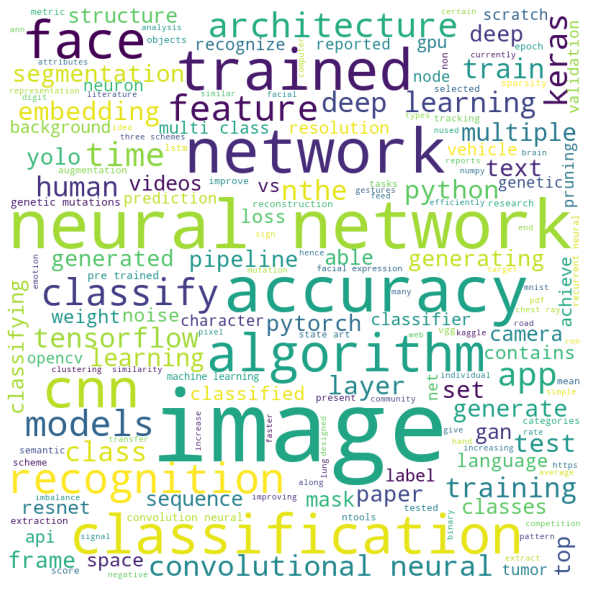

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list10) 
# plot the WordCloud image for cluster 1 min_words = 15                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list2 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 1:
        list2.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list2)

35

In [ ]:
list2

['cool language including phases namely lexer parser semantic analyzer generator coursework iit hyderabad course principles fifth semester',
 'distributed database front end insert view delete patient nfragmented tables distributing state wise sqlplus oracle db php javascript w css',
 'website showcase photography interested photographers nthe website html css javascript ncurrently website four contributors photographs ni server side website respond requests feedback nhave look recommended view laptop desktop nwww pixelstarlab com',
 'android track android smartphones without middle ware servers sms services communication mobiles gpslocationlistener locating mobile coordinates requesting mobile sms sevices viewed maps installed',
 'encryption python principles enigma machine huffman coding',
 'went live onto yahoo website regularly alerts generated discrepancy ntechnologies java pig hadoop big',
 'went live onto yahoo website regularly alerts generated discrepancy ntechnologies java pi

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list2)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
27         website  0.202855
14            java  0.107487
3              css  0.098855
7              end  0.092097
12            html  0.086116
13        html css  0.086116
15      javascript  0.077361
16            like  0.077360
23          server  0.075199
17           mysql  0.074155
19             php  0.072926
22      principles  0.067228
18   ntechnologies  0.066021
2           course  0.061676
25        software  0.061335
5         database  0.058409
0          android  0.058248
10       framework  0.055772
8      engineering  0.055733
9         features  0.053798
11            free  0.052457
26        students  0.050920
1          college  0.047158
4   css javascript  0.045966
24         service  0.045729
20       php mysql  0.044210
21        platform  0.043566
28    website like  0.043178
6           django  0.030758

In [ ]:
list20 = ' '.join(list2)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list20)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of cool is : 1
Frequency of language is : 2
Frequency of including is : 1
Frequency of phases is : 1
Frequency of namely is : 1
Frequency of lexer is : 1
Frequency of parser is : 1
Frequency of semantic is : 1
Frequency of analyzer is : 1
Frequency of generator is : 1
Frequency of coursework is : 1
Frequency of iit is : 1
Frequency of hyderabad is : 1
Frequency of course is : 4
Frequency of principles is : 4
Frequency of fifth is : 1
Frequency of semester is : 1
Frequency of distributed is : 2
Frequency of database is : 6
Frequency of front is : 3
Frequency of end is : 8
Frequency of insert is : 1
Frequency of view is : 2
Frequency of delete is : 1
Frequency of patient is : 1
Frequency of nfragmented is : 1
Frequency of tables is : 2
Frequency of distributing is : 1
Frequency of state is : 1
Frequency of wise is : 1
Frequency of sqlplus is : 1
Frequency of oracle is : 1
Frequency of db is : 2
Frequency of php is : 7
Frequency of javascript is : 8
Frequency of w is : 2
Frequen

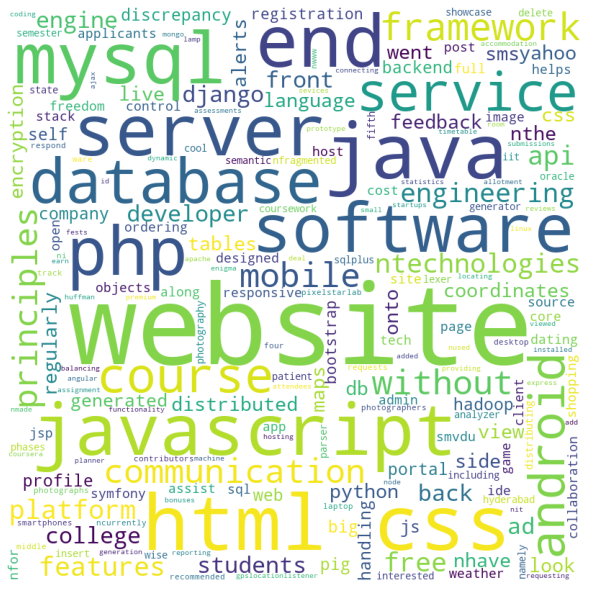

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list20) 
# plot the WordCloud image for cluster 1 min_words = 20                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list3 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 2:
        list3.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list3)


161

In [ ]:
list3

['author python library einsteinpy library computations nrelativity geodesic equations solving odes visualisations summer gsoc openastronomy numbrella along standalone organisation esa socis set ci cd test automation documentation forthe codebase research university toronto cern nstudying negative matter effect gravitational lensing sponsored python software foundation numfocus esa',
 'client wanted entities documents due documents size taking lot time manually automate names entities recognition entity disambiguation',
 'shooting game pygame end animations maximize score shooting enemy spaceships asteroids',
 'players elaborate manual workflow evaluate nevaluation players multi million dollar industry generate four times revenue compared calculate entire game digitalized cameras iot devices cloud gpus tensorflow computer vision fr cnn models step game enabled valuation fraud models',
 'heavy loads servers reduced ipfs warning red zones city',
 'chunking maximum entropy models koe http

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list3)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
12         android  0.036699
16             app  0.031952
184         python  0.030564
84            game  0.030380
124           like  0.023630
76        features  0.023194
122        library  0.021341
121       learning  0.021044
118       language  0.019171
57        designed  0.019093
78           files  0.018792
205     similarity  0.017771
105          image  0.017688
10        analysis  0.017300
85        generate  0.017254
142         models  0.017069
226           time  0.017043
224           test  0.017022
21           audio  0.016668
248            web  0.016653
17           areas  0.016567
83   functionality  0.016558
8       algorithms  0.016557
4               ai  0.016396
91             gui  0.016156
243         visual  0.015826
168       platform  0.014927
179     processing  0.014890
154           nthe  0.014535
89            good  0.014316

In [ ]:
list30 = ' '.join(list3)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list30)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of author is : 1
Frequency of python is : 20
Frequency of library is : 11
Frequency of einsteinpy is : 1
Frequency of computations is : 1
Frequency of nrelativity is : 1
Frequency of geodesic is : 1
Frequency of equations is : 2
Frequency of solving is : 1
Frequency of odes is : 1
Frequency of visualisations is : 2
Frequency of summer is : 1
Frequency of gsoc is : 1
Frequency of openastronomy is : 1
Frequency of numbrella is : 1
Frequency of along is : 4
Frequency of standalone is : 1
Frequency of organisation is : 1
Frequency of esa is : 2
Frequency of socis is : 1
Frequency of set is : 8
Frequency of ci is : 2
Frequency of cd is : 1
Frequency of test is : 11
Frequency of automation is : 2
Frequency of documentation is : 3
Frequency of forthe is : 1
Frequency of codebase is : 1
Frequency of research is : 5
Frequency of university is : 5
Frequency of toronto is : 1
Frequency of cern is : 4
Frequency of nstudying is : 1
Frequency of negative is : 1
Frequency of matter is : 2
F

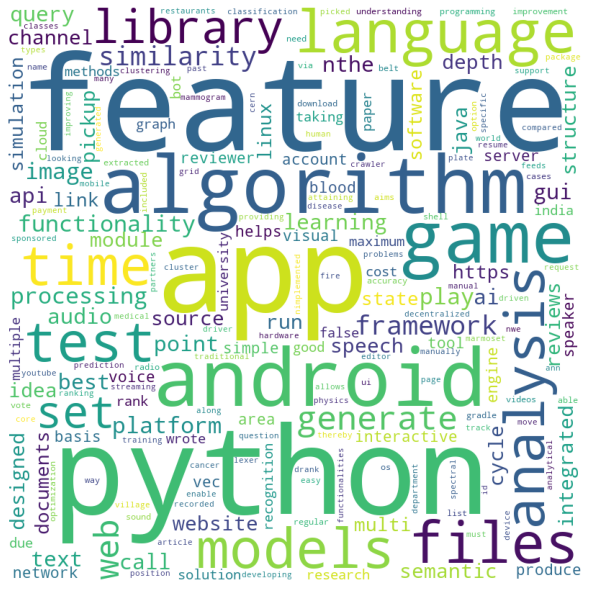

In [ ]:
list30 = ' '.join(list3)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list30) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list4 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 3:
        list4.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list4)

75

In [ ]:
list4

['beat baseline score credibility prediction events credbank initial exploratory analysis multi hierarchical attention network operating tweet plan hierarchical transformer encoder decoder architecture improve',
 'bidirectional autoencoder extracted context nreference get softmax probabilities possible answers question extracted edges relations commonsense corporas like conceptnet nell making commonsense inclusive vectors relations extracted like conceptnet numberbatch nresearch areas natural language processing machine learning',
 'analyst collects thousands points sources initiated automate advance natural language processing segmentation classification association extract past collected analysts training improve accuracy',
 'novel emotions like happy sad angry textual conversations na tree lstm deep learning variation tree lstm behavior negative positive lexicons naive bayes algorithm noisy text gain insights',
 'multiple modules deep learning networks like cnn rnn gru lstm multiple

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list4)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
54              learning  0.092069
22                  deep  0.060587
49              language  0.058911
23         deep learning  0.058783
60                  lstm  0.052031
61               machine  0.051003
57                  like  0.048750
122              trained  0.045719
118                 text  0.044882
62      machine learning  0.040726
64                models  0.040705
68               natural  0.040657
93             questions  0.040157
3               analysis  0.038847
90                python  0.038424
15        classification  0.035580
69      natural language  0.035322
89            processing  0.034987
73               network  0.034861
37              features  0.034280
92              question  0.033163
36               feature  0.031758
75                neural  0.031736
103            sentiment  0.030569
1              algorithm  0.030001
46                 image  0.029362
50   language processing  0.028610
70              negative  0.027982
84              positive  0.027982
28                   end  0.027823

In [ ]:
list40 = ' '.join(list4)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list40)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of beat is : 2
Frequency of baseline is : 4
Frequency of score is : 5
Frequency of credibility is : 1
Frequency of prediction is : 5
Frequency of events is : 3
Frequency of credbank is : 1
Frequency of initial is : 2
Frequency of exploratory is : 2
Frequency of analysis is : 16
Frequency of multi is : 7
Frequency of hierarchical is : 4
Frequency of attention is : 7
Frequency of network is : 13
Frequency of operating is : 2
Frequency of tweet is : 1
Frequency of plan is : 1
Frequency of transformer is : 2
Frequency of encoder is : 4
Frequency of decoder is : 4
Frequency of architecture is : 8
Frequency of improve is : 3
Frequency of bidirectional is : 5
Frequency of autoencoder is : 1
Frequency of extracted is : 6
Frequency of context is : 4
Frequency of nreference is : 1
Frequency of get is : 4
Frequency of softmax is : 1
Frequency of probabilities is : 1
Frequency of possible is : 1
Frequency of answers is : 4
Frequency of question is : 13
Frequency of edges is : 1
Frequency

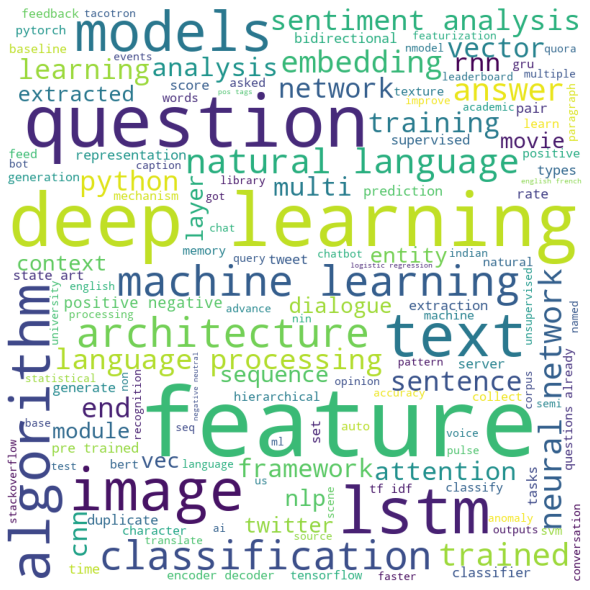

In [ ]:
list40 = ' '.join(list4)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list40) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list5 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 4:
        list5.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list5)

69

In [ ]:
list5

['algorithm dynamic maze moving obstacles path source destination',
 'autonomous humanoid agents playing soccer intelligently simulated nenvironment following physics rule soccer optimized like walking kicking factor x evolutionary strategies cma es ever simspark humanoid gym openai rl nalgorithms trpo ddpg optimize passing dodging defense positioning modules voronoi point map nping hungarian algorithm active attacker selection secured nd position goalie scientific finished th league undergraduate qualify ever competition',
 'designing software air collaborative robot detecting position aeroplane cracks corrosion inspection body aeroplane trained predefined images cracks corrosion lidar air cobot aircraft inspection capturing live image processing opencv labelling images labelme software',
 'android app driving collecting smart phone sensors like accelerometer gps gyroscope unsafe harsh driving k means clustering algorithm found thresholds events brake acceleration left turn right turn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list5)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
50              image  0.079988
1           algorithm  0.056486
4             android  0.053878
98              robot  0.052938
18                car  0.049687
118              time  0.047342
88         processing  0.046968
66             module  0.038552
11         autonomous  0.037313
24            control  0.036262
76             opencv  0.034597
6                 app  0.034010
51   image processing  0.033872
52             images  0.032450
72            network  0.030765
110         simulated  0.029637
34            driving  0.029306
3            analysis  0.028962
7             arduino  0.028822
33             driver  0.027906
62             matlab  0.027870
75           obstacle  0.027539
80               path  0.026891
109            simple  0.026135
41               fpga  0.026020
100               ros  0.025530
89          processor  0.025307
19            changes  0.024916
93             python  0.024692
42           gestures  0.024448

In [ ]:
list50 = ' '.join(list5)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list50)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of algorithm is : 16
Frequency of dynamic is : 3
Frequency of maze is : 2
Frequency of moving is : 3
Frequency of obstacles is : 2
Frequency of path is : 6
Frequency of source is : 3
Frequency of destination is : 1
Frequency of autonomous is : 11
Frequency of humanoid is : 2
Frequency of agents is : 1
Frequency of playing is : 3
Frequency of soccer is : 2
Frequency of intelligently is : 1
Frequency of simulated is : 6
Frequency of nenvironment is : 1
Frequency of following is : 5
Frequency of physics is : 1
Frequency of rule is : 1
Frequency of optimized is : 2
Frequency of like is : 5
Frequency of walking is : 1
Frequency of kicking is : 1
Frequency of factor is : 1
Frequency of x is : 4
Frequency of evolutionary is : 2
Frequency of strategies is : 1
Frequency of cma is : 1
Frequency of es is : 1
Frequency of ever is : 2
Frequency of simspark is : 1
Frequency of gym is : 1
Frequency of openai is : 1
Frequency of rl is : 1
Frequency of nalgorithms is : 1
Frequency of trpo is 

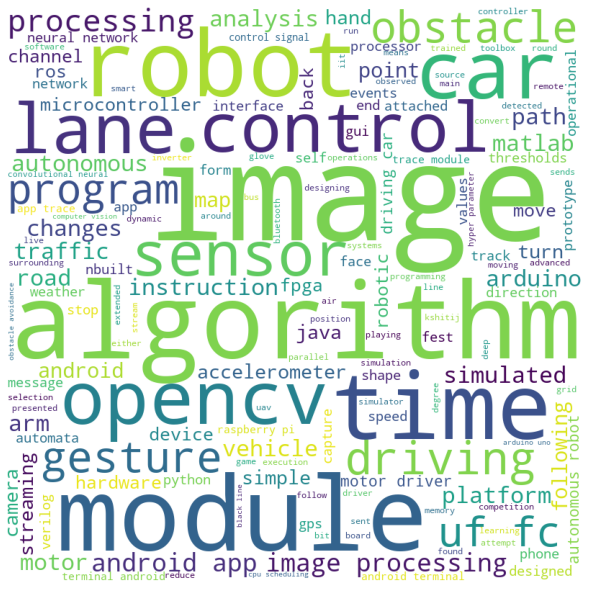

In [ ]:
list50 = ' '.join(list5)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list50) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list6 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 5:
        list6.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list6)

27

In [ ]:
list6

['reviews cleaning visualization predicting sentiments reviews algorithms multinomial naive baye python accuracy end end web app link https tinyurl com sentiment',
 'top headlines date cleaning visualization predicting stock price news headlines algorithms logistic regression random forest multinomial naive bayes python accuracy',
 'sms messages cleaning visualization predicting sms spam ham algorithms multinomial naive bayes python accuracy end end web app link https tinyurl com spam sms detector',
 'taken kaggle com news headlines cleaning visualization predicting news fake algorithms logistic regression multinomial naive bayes python accuracy',
 'taken kaggle com movie scripts script words associated genre cleaning visualization predicting genre movie words script algorithms multinomial naive bayes python accuracy end end web app link https tinyurl com movie genre classifier',
 'independent features exploratory analysis cleaning visualization models classifying diabetes algorithms l

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list6)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
2               algorithms  0.111513
48                  python  0.096457
26                  forest  0.086968
51           random forest  0.086968
50                  random  0.086910
52              regression  0.083743
0                 accuracy  0.082823
14                cleaning  0.077734
17                decision  0.073691
47              prediction  0.072177
25                features  0.072131
57                    spam  0.070752
37     logistic regression  0.070447
36                logistic  0.070447
66           visualization  0.069246
43                   naive  0.069012
56                     set  0.068209
40                  models  0.067340
9                    bayes  0.066898
44             naive bayes  0.066898
46              predicting  0.065672
63                    tree  0.060568
15  cleaning visualization  0.059227
30             independent  0.058146
45                    news  0.056814
18           decision tree  0.055794
49         python accuracy  0.055135
33                    like  0.053903
5                 analysis  0.053768
19                     end  0.053082

In [ ]:
list60 = ' '.join(list6)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list60)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of reviews is : 2
Frequency of cleaning is : 12
Frequency of visualization is : 10
Frequency of predicting is : 9
Frequency of sentiments is : 1
Frequency of algorithms is : 19
Frequency of multinomial is : 5
Frequency of naive is : 9
Frequency of baye is : 1
Frequency of python is : 15
Frequency of accuracy is : 14
Frequency of end is : 8
Frequency of web is : 5
Frequency of app is : 5
Frequency of link is : 5
Frequency of https is : 4
Frequency of tinyurl is : 3
Frequency of com is : 6
Frequency of sentiment is : 2
Frequency of top is : 1
Frequency of headlines is : 3
Frequency of date is : 1
Frequency of stock is : 2
Frequency of price is : 2
Frequency of news is : 5
Frequency of logistic is : 9
Frequency of regression is : 12
Frequency of random is : 13
Frequency of forest is : 12
Frequency of bayes is : 8
Frequency of sms is : 3
Frequency of messages is : 1
Frequency of spam is : 6
Frequency of ham is : 1
Frequency of detector is : 1
Frequency of taken is : 2
Frequency o

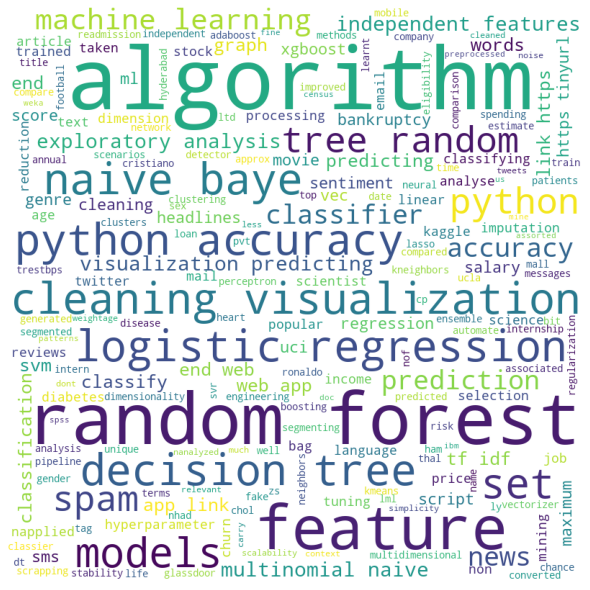

In [ ]:
list60 = ' '.join(list6)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list60) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list7 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 6:
        list7.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list7)

137

In [ ]:
list7

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs achieve scalable web crawler get job descriptions websites job descriptions resume processed text mining extract finally predictive jobs similar resume',
 'leading telecom firm predictive models risk churn main indicators churn filtered revenue generate telecom firm tagging churned service usage models risk churned also strong indicators churn',
 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list7)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
267              time  0.042274
13           analysis  0.037937
136           machine  0.034480
241               set  0.032008
125          learning  0.030424
89           features  0.028384
232             sales  0.028265
9           algorithm  0.027472
137  machine learning  0.025001
210            python  0.024086
184        parameters  0.023842
222        regression  0.022517
93          financial  0.022490
86            factors  0.022324
159            models  0.020791
10         algorithms  0.020249
230              risk  0.020133
154          modeling  0.020030
126              like  0.019707
196         predicted  0.018476
37         classifier  0.017800
42         clustering  0.016490
255             stock  0.016486
87            feature  0.016442
199        predictive  0.016299
167           network  0.016012
197        predicting  0.015997
202             price  0.015908
236             score  0.015755
265              text  0.015562

In [ ]:
list70 = ' '.join(list7)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list70)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of de is : 2
Frequency of duplication is : 2
Frequency of faces is : 1
Frequency of major is : 8
Frequency of challenges is : 2
Frequency of dup is : 1
Frequency of algorithm is : 19
Frequency of complexity is : 2
Frequency of means is : 2
Frequency of time is : 35
Frequency of get is : 9
Frequency of answer is : 3
Frequency of rise is : 1
Frequency of exponentially is : 1
Frequency of increase is : 6
Frequency of solved is : 2
Frequency of sorted is : 1
Frequency of neighborhood is : 1
Frequency of second is : 4
Frequency of achieve is : 7
Frequency of tradeoff is : 1
Frequency of precision is : 2
Frequency of recall is : 2
Frequency of improves is : 2
Frequency of score is : 8
Frequency of machine is : 15
Frequency of learning is : 17
Frequency of collecting is : 3
Frequency of training is : 5
Frequency of analyze is : 3
Frequency of steel is : 1
Frequency of cast is : 1
Frequency of limited is : 2
Frequency of forging is : 1
Frequency of companys is : 2
Frequency of compar

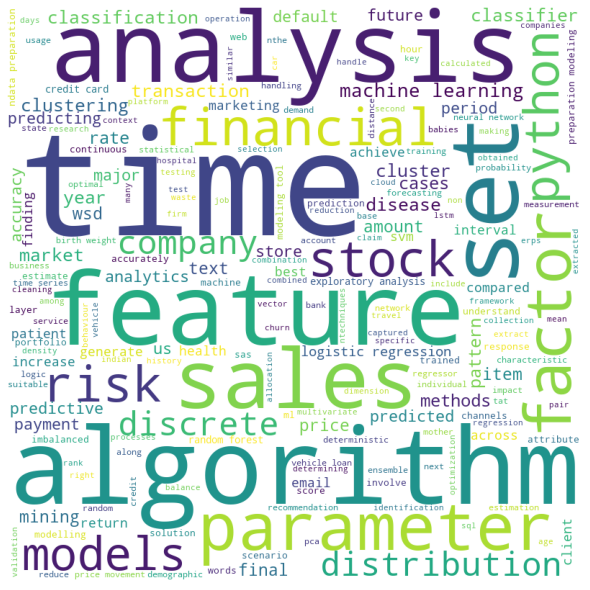

In [ ]:
list70 = ' '.join(list7)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list70) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 